In [8]:
import numpy as np
import pandas as pd

In [9]:
df = pd.read_csv('spam.csv', encoding='ISO-8859-1')

In [10]:
df.head(5)

,Category,Type,Value
0,Spam,URL,http://crypto-wealth.biz/bitcoin-investment-of...
1,Spam,Email,loan.approval.notice.0@fast-cash.co
2,Ham,Email,user1498@example.com
3,Spam,Email,prize.winner.now.85@get-your-cash.net
4,Spam,URL,http://find-love.club/dating-match?id=170


In [11]:
df.sample(5)


,Category,Type,Value
3786,Spam,Email,free.money.offer.89@limited-time.biz
3623,Spam,URL,http://get-your-cash.net/prize-winner?id=151
1614,Spam,Email,job.offer.urgent.83@career-opportunities.net
4406,Spam,Email,job.offer.urgent.153@career-opportunities.net
8673,Spam,URL,http://find-love.club/dating-match?id=113


In [12]:
df.shape

(11000, 3)

In [13]:
df.sample(10)


,Category,Type,Value
5522,Ham,URL,https://www.example.com/page578
6049,Spam,Email,amazon.order.issue.179@order-processing.online
3580,Spam,Email,lottery.winner.notification.111@lucky-draw.org
5196,Ham,URL,https://www.example.com/page1795
9203,Spam,URL,http://account-limited.net/paypal-security-cen...
2695,Ham,URL,https://www.example.com/page2061
9199,Ham,Email,user2205@example.com
5849,Spam,URL,http://limited-time.biz/free-money-offer?id=265
6276,Spam,Email,urgent.notice.123.25@suspiciousdomain.com
10148,Ham,URL,https://www.example.com/page1964


In [14]:
df.head()

,Category,Type,Value
0,Spam,URL,http://crypto-wealth.biz/bitcoin-investment-of...
1,Spam,Email,loan.approval.notice.0@fast-cash.co
2,Ham,Email,user1498@example.com
3,Spam,Email,prize.winner.now.85@get-your-cash.net
4,Spam,URL,http://find-love.club/dating-match?id=170


In [15]:
# Data Cleaning
# EDA
# Text Preprocessing
# model building
# Evaluation
# Improvement
# Website
# Deploy

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11000 entries, 0 to 10999
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  11000 non-null  object
 1   Type      11000 non-null  object
 2   Value     11000 non-null  object
dtypes: object(3)
memory usage: 257.9+ KB


In [17]:
# drop last 3 Cloumns
#df.drop(columns=['Unnamed: 2' , 'Unnamed: 3' , 'Unnamed: 4'], inplace =True)

In [18]:
df.sample(5)

,Category,Type,Value
4222,Ham,URL,https://www.example.com/page1082
10821,Spam,URL,http://find-love.club/dating-match?id=98
6715,Ham,Email,user283@example.com
2994,Ham,Email,user1551@example.com
7346,Spam,Email,account.security.alert.49@login-verify.info


In [19]:
#renaming the columns
df.rename(columns={'Category':'target','Value':'text'},inplace=True)

In [20]:
df.sample(5)

,target,Type,text
2633,Spam,URL,http://suspiciousdomain.com/urgent-notice?id=44
5994,Spam,Email,unauthorized.access.165@security-team.net
2934,Ham,URL,https://www.example.com/page1486
2489,Spam,URL,http://service-notification.org/important-upda...
8071,Spam,Email,dating.match.for.you.102@find-love.club


In [21]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [22]:
df['target'] = encoder.fit_transform(df['target'])

In [23]:
df.head()

,target,Type,text
0,1,URL,http://crypto-wealth.biz/bitcoin-investment-of...
1,1,Email,loan.approval.notice.0@fast-cash.co
2,0,Email,user1498@example.com
3,1,Email,prize.winner.now.85@get-your-cash.net
4,1,URL,http://find-love.club/dating-match?id=170


In [24]:
# missing Values
df.isnull().sum()

,0
target,0
Type,0
text,0


In [25]:
df.duplicated().sum()

np.int64(0)

In [26]:
#remove duplicates
df = df.drop_duplicates(keep = 'first')

In [27]:

df.duplicated().sum()

np.int64(0)

In [28]:
df.shape

(11000, 3)

In [29]:
#EDA

In [30]:
df.head()

,target,Type,text
0,1,URL,http://crypto-wealth.biz/bitcoin-investment-of...
1,1,Email,loan.approval.notice.0@fast-cash.co
2,0,Email,user1498@example.com
3,1,Email,prize.winner.now.85@get-your-cash.net
4,1,URL,http://find-love.club/dating-match?id=170


In [31]:
df['target'].value_counts()

,count
target,
1,5500
0,5500


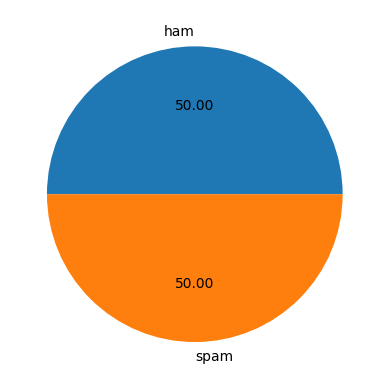

In [32]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham' , 'spam'],autopct="%0.2f")
plt.show()

In [33]:
#Data is imbalanced

In [34]:
import nltk

In [35]:
!pip install nltk

In [36]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [37]:
#no. of characters in sms
#no. of word in sms
#no. of sentences in sms

In [38]:
df['text'].apply(len)

,text
0,55
1,35
2,20
3,37
4,41
...,...
10995,19
10996,51
10997,37
10998,45


In [39]:
df['num_characters'] = df['text'].apply(len)

In [40]:
df.head()

,target,Type,text,num_characters
0,1,URL,http://crypto-wealth.biz/bitcoin-investment-of...,55
1,1,Email,loan.approval.notice.0@fast-cash.co,35
2,0,Email,user1498@example.com,20
3,1,Email,prize.winner.now.85@get-your-cash.net,37
4,1,URL,http://find-love.club/dating-match?id=170,41


In [41]:
# no. of words
from nltk.tokenize import NLTKWordTokenizer

In [42]:
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [43]:
df.head()

,target,Type,text,num_characters,num_words
0,1,URL,http://crypto-wealth.biz/bitcoin-investment-of...,55,5
1,1,Email,loan.approval.notice.0@fast-cash.co,35,3
2,0,Email,user1498@example.com,20,3
3,1,Email,prize.winner.now.85@get-your-cash.net,37,3
4,1,URL,http://find-love.club/dating-match?id=170,41,5


In [44]:
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [45]:
df.head()

,target,Type,text,num_characters,num_words,num_sentences
0,1,URL,http://crypto-wealth.biz/bitcoin-investment-of...,55,5,1
1,1,Email,loan.approval.notice.0@fast-cash.co,35,3,1
2,0,Email,user1498@example.com,20,3,1
3,1,Email,prize.winner.now.85@get-your-cash.net,37,3,1
4,1,URL,http://find-love.club/dating-match?id=170,41,5,1


In [46]:
df[['num_characters' , 'num_words' , 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,11000.000000,11000.000000,11000.0
mean,35.848273,3.490909,1.0
std,11.924566,0.860752,0.0
min,17.000000,3.000000,1.0
25%,26.750000,3.000000,1.0
50%,32.500000,3.000000,1.0
75%,46.000000,3.000000,1.0
max,58.000000,5.000000,1.0


In [47]:
# ham messages
df[df['target'] == 0][['num_characters' , 'num_words' , 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5500.000000,5500.0,5500.0
mean,25.596364,3.0,1.0
std,6.027818,0.0,0.0
min,17.000000,3.0,1.0
25%,20.000000,3.0,1.0
50%,24.500000,3.0,1.0
75%,32.000000,3.0,1.0
max,32.000000,3.0,1.0


In [48]:
# spam messages
df[df['target'] == 1][['num_characters' , 'num_words' , 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5500.000000,5500.000000,5500.0
mean,46.100182,3.981818,1.0
std,6.151447,0.999926,0.0
min,33.000000,3.000000,1.0
25%,41.000000,3.000000,1.0
50%,46.000000,3.000000,1.0
75%,51.000000,5.000000,1.0
max,58.000000,5.000000,1.0


In [49]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

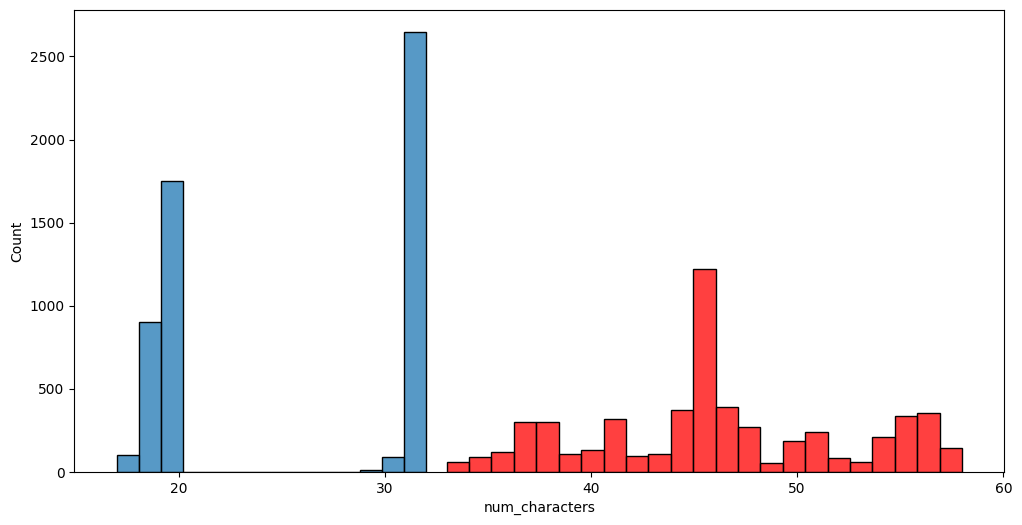

In [50]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'] , color = 'red')

<Axes: xlabel='num_words', ylabel='Count'>

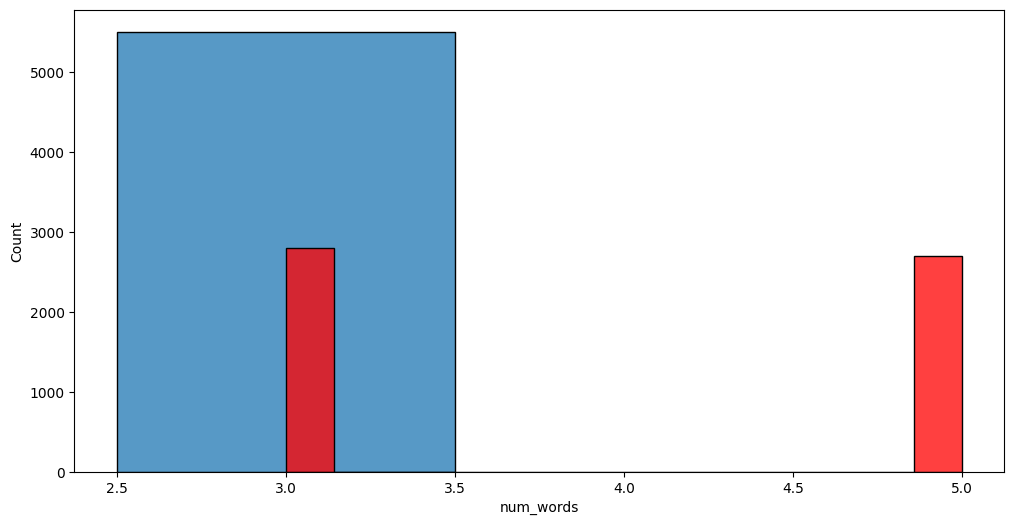

In [51]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'] , color = 'red')

<Axes: xlabel='num_words', ylabel='Count'>

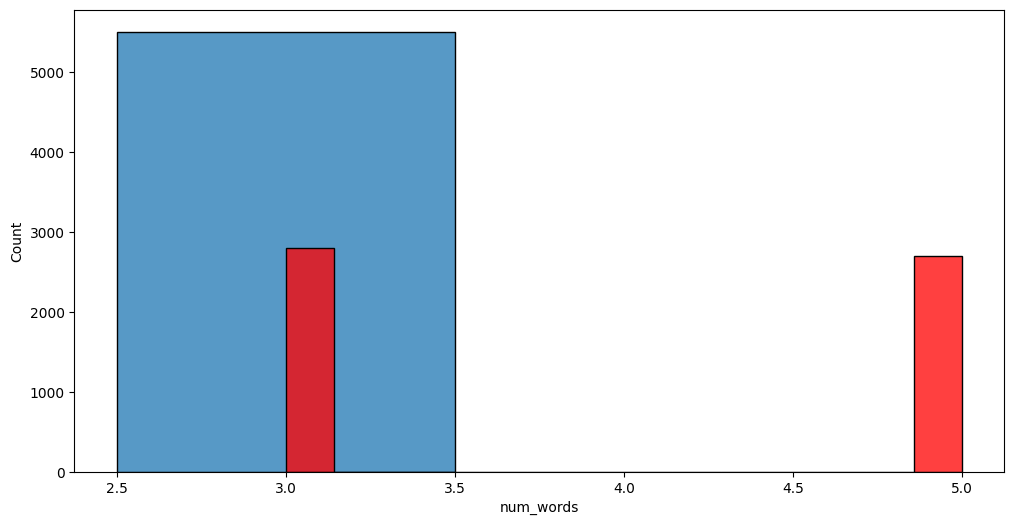

In [52]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'] , color = 'red')

<Axes: xlabel='num_sentences', ylabel='Count'>

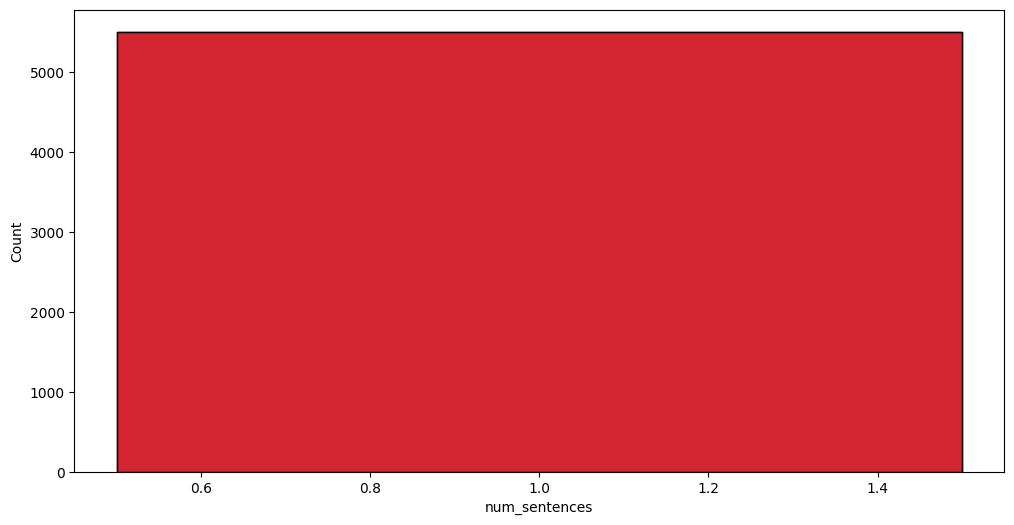

In [53]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_sentences'])
sns.histplot(df[df['target'] == 1]['num_sentences'] , color = 'red')

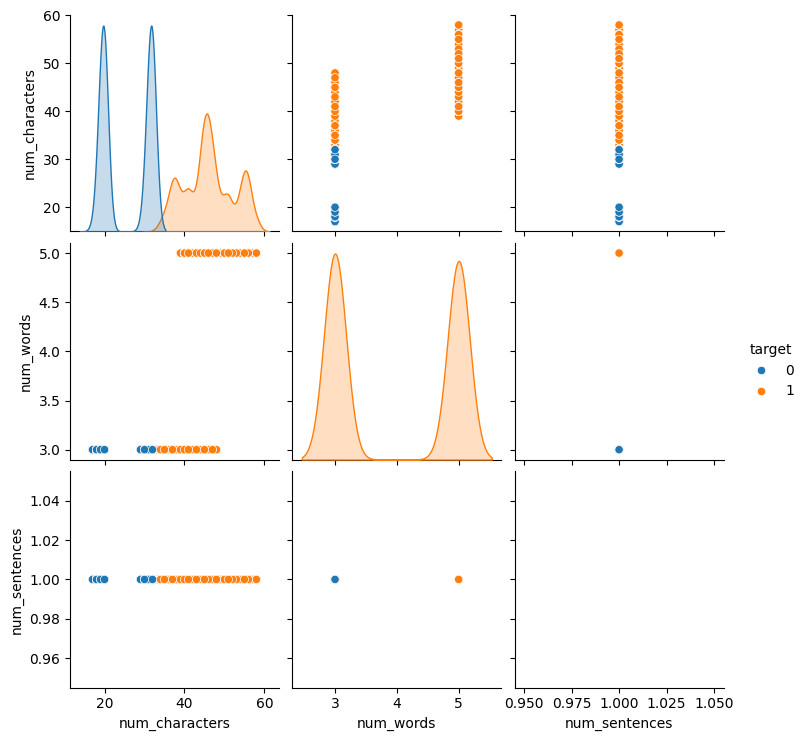

In [54]:
sns.pairplot(df,hue='target')

In [55]:
df1 = df[['target', 'num_characters' , 'num_words' , 'num_sentences' ]]
df1.corr()

,target,num_characters,num_words,num_sentences
target,1.000000,0.859769,0.570352,NaN
num_characters,0.859769,1.000000,0.701320,NaN
num_words,0.570352,0.701320,1.000000,NaN
num_sentences,NaN,NaN,NaN,NaN


<Axes: >

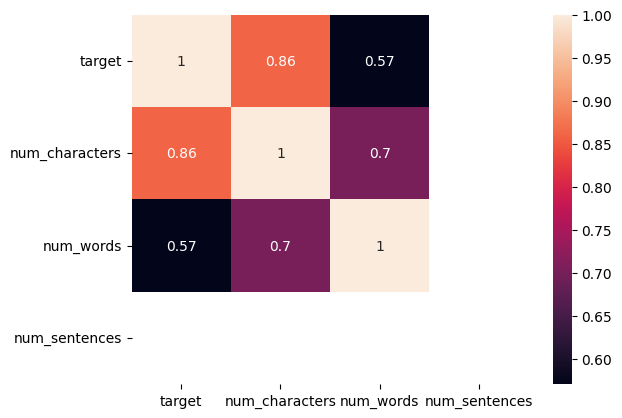

In [56]:
sns.heatmap(df1.corr() , annot=True)

In [57]:
# Data/Text Processing
# 1 Lower case
# 2 Tokenization
# 3 Removing special charaters
# 4 Removing stop word and punctuation
# 5 Stemming

In [58]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)

    y = []
    for i in text:
        if i.isalnum():
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))
    return " ".join(y)

In [59]:
#not working
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [62]:
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))

In [63]:
stop = stopwords.words('english')

In [64]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [65]:
transform_text('Hi,   he is the best singer in the city 20% ***----------*You')

'hi best singer citi 20'

In [66]:
df['text'][0]


'http://crypto-wealth.biz/bitcoin-investment-offer?id=78'

In [67]:
transform_text('Hi,  20% ***----------*Y///////////??????////?????????/CCCCCCCCCCou')

'hi 20'

In [68]:
transform_text('You you  a a they them Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...')

'go jurong point crazi avail bugi n great world la e buffet cine got amor wat'

In [69]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('laughing')

'laugh'

In [70]:
df['transformed_text'] = df['text'].apply(transform_text)

In [71]:
t_text = " ".join(df['transformed_text'])


In [72]:
from wordcloud import WordCloud
wc = WordCloud(width=500, height=500, min_font_size = 10 , background_color='white').generate(t_text)

In [73]:
transformed_text=df['transformed_text']

In [74]:
df.head()

,target,Type,text,num_characters,num_words,num_sentences,transformed_text
0,1,URL,http://crypto-wealth.biz/bitcoin-investment-of...,55,5,1,http
1,1,Email,loan.approval.notice.0@fast-cash.co,35,3,1,
2,0,Email,user1498@example.com,20,3,1,user1498
3,1,Email,prize.winner.now.85@get-your-cash.net,37,3,1,
4,1,URL,http://find-love.club/dating-match?id=170,41,5,1,http


In [75]:
import sys
print(sys.executable)


/usr/bin/python3


In [76]:
!pip install wordcloud


In [77]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep =" "))

ValueError: We need at least 1 word to plot a word cloud, got 0.

In [78]:
plt.figure(figsize=(12,6))
plt.imshow(spam_wc)

NameError: name 'spam_wc' is not defined

<Figure size 1200x600 with 0 Axes>

In [79]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep =" "))

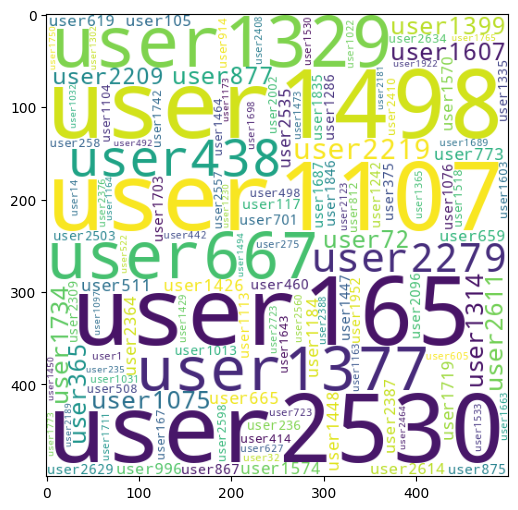

In [80]:
plt.figure(figsize=(12,6))
plt.imshow(ham_wc)

In [81]:
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [82]:
len(spam_corpus)

2700

In [83]:
import matplotlib.pyplot as plt

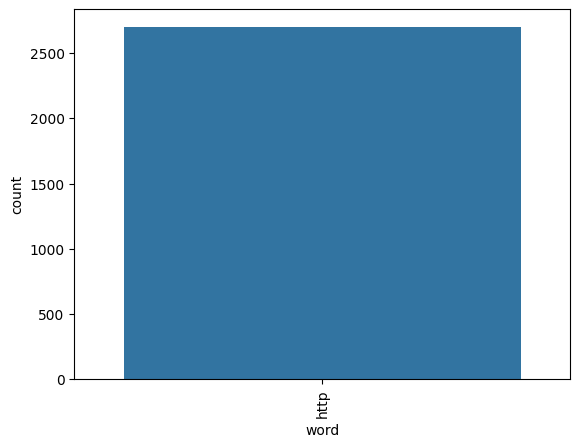

In [84]:
from collections import Counter
counter_data = pd.DataFrame(Counter(spam_corpus).most_common(30), columns=["word", "count"])
sns.barplot(x='word', y='count', data=counter_data)
plt.xticks(rotation='vertical')
plt.show()


In [85]:
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [86]:
len(ham_corpus)

5500

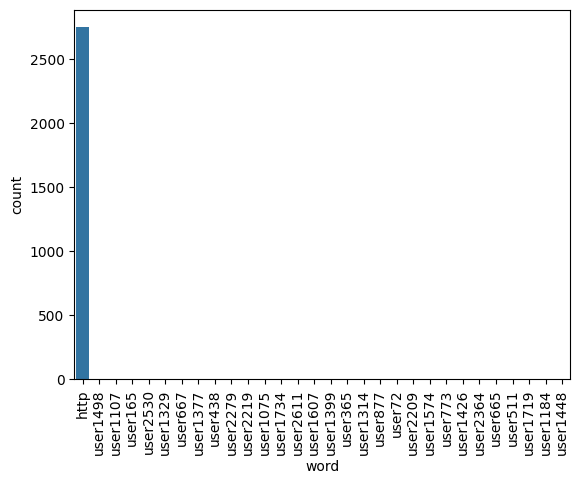

In [87]:
ham_counter = pd.DataFrame(Counter(ham_corpus).most_common(30), columns=["word", "count"])
sns.barplot(x='word', y='count', data=ham_counter)
plt.xticks(rotation='vertical')
plt.show()

In [88]:
#Model Building

In [89]:
#bag of words
#tfidf
#word to vector

In [90]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features = 3000)

In [91]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [92]:
#from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler()
#X = scaler.fit_transform(X)

In [93]:
# appending the num_character col to X
X = np.hstack((X,df['num_characters'].values.reshape(-1,1)))

In [94]:
X.shape

(11000, 2752)

In [95]:
y = df['target'].values

In [96]:
y

array([1, 1, 0, ..., 1, 1, 0])

In [97]:
from sklearn.model_selection import train_test_split


In [98]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)


In [99]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,classification_report

In [100]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [101]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.48545454545454547
[[   0 1132]
 [   0 1068]]
0.48545454545454547


In [102]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.48545454545454547
[[   0 1132]
 [   0 1068]]
0.48545454545454547


In [103]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.48545454545454547
[[   0 1132]
 [   0 1068]]
0.48545454545454547


In [104]:
# as data is imbalanced so precision score matters more than accuracy
# tfidf -> MNB

In [105]:
!pip install xgboost


In [106]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [107]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [108]:
clfs = {
    'SVC' : svc,
    'KN' : knc,
    'NB': mnb,
    'DT': dtc,
    'LR': lrc,
    'RF': rfc,
    'AdaBoost': abc,
    'BgC': bc,
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [109]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred, zero_division=1)  #It will set the precision to 1 in case of no positive predictions.
   # precision = precision_score(y_test,y_pred)

    return accuracy,precision

In [110]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.48545454545454547, 0.48545454545454547)

In [111]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():

    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)

    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)

    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.48545454545454547
Precision -  0.48545454545454547
For  KN
Accuracy -  1.0
Precision -  1.0
For  NB
Accuracy -  0.48545454545454547
Precision -  0.48545454545454547
For  DT
Accuracy -  1.0
Precision -  1.0
For  LR
Accuracy -  1.0
Precision -  1.0
For  RF
Accuracy -  1.0
Precision -  1.0
For  AdaBoost
Accuracy -  1.0
Precision -  1.0
For  BgC
Accuracy -  1.0
Precision -  1.0
For  ETC
Accuracy -  1.0
Precision -  1.0
For  GBDT
Accuracy -  1.0
Precision -  1.0
For  xgb
Accuracy -  1.0
Precision -  1.0


In [112]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)


In [113]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,1.000000,1.000000
4,LR,1.000000,1.000000
3,DT,1.000000,1.000000
7,BgC,1.000000,1.000000
8,ETC,1.000000,1.000000
5,RF,1.000000,1.000000
6,AdaBoost,1.000000,1.000000
9,GBDT,1.000000,1.000000
10,xgb,1.000000,1.000000
2,NB,0.485455,0.485455


In [114]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")


In [115]:
performance_df1


,Algorithm,variable,value
0,KN,Accuracy,1.000000
1,LR,Accuracy,1.000000
2,DT,Accuracy,1.000000
3,BgC,Accuracy,1.000000
4,ETC,Accuracy,1.000000
5,RF,Accuracy,1.000000
6,AdaBoost,Accuracy,1.000000
7,GBDT,Accuracy,1.000000
8,xgb,Accuracy,1.000000
9,NB,Accuracy,0.485455


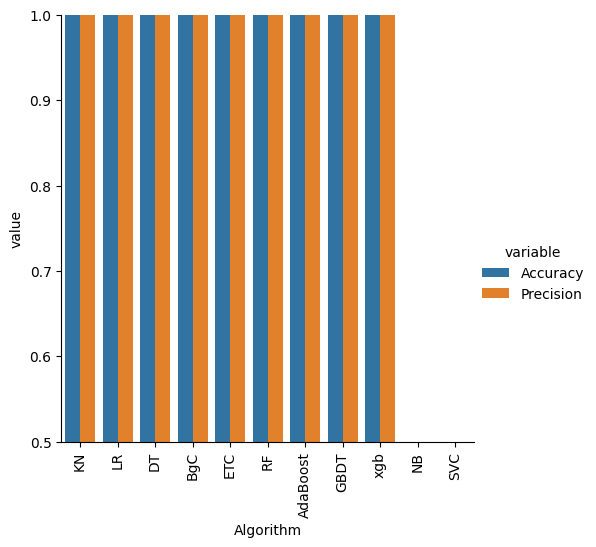

In [116]:
sns.catplot(x = 'Algorithm', y='value',
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [117]:
#model improve
#1. Change the max_features parameter of Tfidf

In [118]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)

new_df = performance_df.merge(temp_df,on='Algorithm')

In [119]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)


In [120]:
new_df_scaled = new_df.merge(temp_df,on='Algorithm')

In [121]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)


In [122]:
new_df_scaled.merge(temp_df,on='Algorithm')


,Algorithm,Accuracy,Precision,Accuracy_max_ft_3000,Precision_max_ft_3000,Accuracy_scaling,Precision_scaling,Accuracy_num_chars,Precision_num_chars
0,KN,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,LR,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2,DT,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
3,BgC,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
4,ETC,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
5,RF,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
6,AdaBoost,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
7,GBDT,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
8,xgb,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
9,NB,0.485455,0.485455,0.485455,0.485455,0.485455,0.485455,0.485455,0.485455


In [123]:
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

MultinomialNB()

In [124]:
y_pred = nb_model.predict(X_test)


In [127]:
print(f'Accuracy: {accuracy_score(y_test, y_pred)}'
      f'Precision: {precision_score(y_test, y_pred)}')
print('Classification Report:')
print(classification_report(y_test, y_pred))

Accuracy: 0.5045454545454545Precision: 0.5045454545454545
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1090
           1       0.50      1.00      0.67      1110

    accuracy                           0.50      2200
   macro avg       0.25      0.50      0.34      2200
weighted avg       0.25      0.50      0.34      2200



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [130]:
import pickle

from sklearn.model_selection import train_test_split

X = df['transformed_text']
y = df['target']

X_train_text, X_test_text, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

vectorizer = TfidfVectorizer(max_features=3001)
X_train_vec = vectorizer.fit_transform(X_train_text)

model = MultinomialNB()
model.fit(X_train_vec, y_train)

# Save the vectorizer and model
with open('vectorizer.pkl', 'wb') as vf:
    pickle.dump(vectorizer, vf)

with open('model.pkl', 'wb') as mf:
    pickle.dump(model, mf)


In [131]:
print(df.columns)


Index(['target', 'Type', 'text', 'num_characters', 'num_words',
       'num_sentences', 'transformed_text'],
      dtype='object')


In [132]:
import requests

def real_time_task():
    while True:
        response = requests.get("https://api.example.com/data")
        if response.status_code == 200:
            data = response.json()
            print("Fetched data:", data)
        else:
            print("Failed to fetch data:", response.status_code)
        time.sleep(30)

In [ ]:
import threading
import time
import requests

def real_time_task():
    while True:
        try:
            response = requests.get("https://jsonplaceholder.typicode.com/posts/1")
            if response.status_code == 200:
                data = response.json()
                print("Fetched data:", data)
            else:
                print("Failed to fetch data:", response.status_code)
        except requests.exceptions.RequestException as e:
            print("Error fetching data:", e)
        time.sleep(30)

def start_background_engine():
    thread = threading.Thread(target=real_time_task, daemon=True)
    thread.start()

if __name__ == "__main__":
    start_background_engine()
    print("Main application continues running...")

    try:
        while True:
            time.sleep(1)
    except KeyboardInterrupt:
        print("\nShutting down.")


Main application continues running...
Fetched data: {'userId': 1, 'id': 1, 'title': 'sunt aut facere repellat provident occaecati excepturi optio reprehenderit', 'body': 'quia et suscipit\nsuscipit recusandae consequuntur expedita et cum\nreprehenderit molestiae ut ut quas totam\nnostrum rerum est autem sunt rem eveniet architecto'}
Fetched data: {'userId': 1, 'id': 1, 'title': 'sunt aut facere repellat provident occaecati excepturi optio reprehenderit', 'body': 'quia et suscipit\nsuscipit recusandae consequuntur expedita et cum\nreprehenderit molestiae ut ut quas totam\nnostrum rerum est autem sunt rem eveniet architecto'}
Fetched data: {'userId': 1, 'id': 1, 'title': 'sunt aut facere repellat provident occaecati excepturi optio reprehenderit', 'body': 'quia et suscipit\nsuscipit recusandae consequuntur expedita et cum\nreprehenderit molestiae ut ut quas totam\nnostrum rerum est autem sunt rem eveniet architecto'}
Fetched data: {'userId': 1, 'id': 1, 'title': 'sunt aut facere repellat

In [ ]:
import threading
import time
import sqlite3
import requests
from datetime import datetime

# SQLite setup
def init_db():
    conn = sqlite3.connect("emails.db")
    c = conn.cursor()
    c.execute('''
        CREATE TABLE IF NOT EXISTS emails (
            id INTEGER PRIMARY KEY AUTOINCREMENT,
            timestamp TEXT,
            subject TEXT,
            body TEXT
        )
    ''')
    conn.commit()
    conn.close()

# Simulated email fetcher
def fetch_email_data():
    # Replace with real logic; this is just sample data
    response = requests.get("https://jsonplaceholder.typicode.com/posts/1")
    if response.status_code == 200:
        data = response.json()
        return {
            "subject": data["title"],
            "body": data["body"]
        }
    return None

# Task that runs every 30 seconds
def real_time_engine():
    while True:
        email = fetch_email_data()
        if email:
            conn = sqlite3.connect("emails.db")
            c = conn.cursor()
            c.execute('''
                INSERT INTO emails (timestamp, subject, body) VALUES (?, ?, ?)
            ''', (datetime.now().isoformat(), email["subject"], email["body"]))
            conn.commit()
            conn.close()
            print("✅ Logged email:", email["subject"])
        else:
            print("⚠️ Failed to fetch email")
        time.sleep(30)

# Start background thread
def start_background_thread():
    thread = threading.Thread(target=real_time_engine, daemon=True)
    thread.start()

if __name__ == "__main__":
    init_db()
    start_background_thread()

    print("🟢 Main app running. Press Ctrl+C to exit.")
    try:
        while True:
            time.sleep(1)
    except KeyboardInterrupt:
        print("\n🛑 Shutting down.")


In [ ]:


import pickle
from flask import Flask, request, jsonify
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB

app = Flask(__name__)

# Load the saved model and vectorizer
with open('model.pkl', 'rb') as model_file:
    model = pickle.load(model_file)

with open('vectorizer.pkl', 'rb') as vectorizer_file:
    vectorizer = pickle.load(vectorizer_file)

@app.route('/predict', methods=['POST'])
def predict():
    try:
        data = request.get_json()
        text = data['text']

        # Transform the input text using the loaded vectorizer
        text_vec = vectorizer.transform([text])
        prediction = model.predict(text_vec)[0]

        return jsonify({'prediction': int(prediction)})

    except Exception as e:
        return jsonify({'error': str(e)}), 500

if __name__ == '__main__':
    app.run(debug=True)
